<a href="https://colab.research.google.com/github/Timchan000/Stock-price-prediction/blob/main/arima(JPMorgan_Chase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

jpmorgan = pd.read_csv('JPMorgan_Chase.csv')
jpmorgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
jpmorgan['Date'] = pd.to_datetime(jpmorgan['Date'])
jpmorgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')

In [ ]:
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])

In [ ]:
df = pd.merge(df_dates, jpmorgan, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.409776,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06


In [ ]:
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.409776,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06


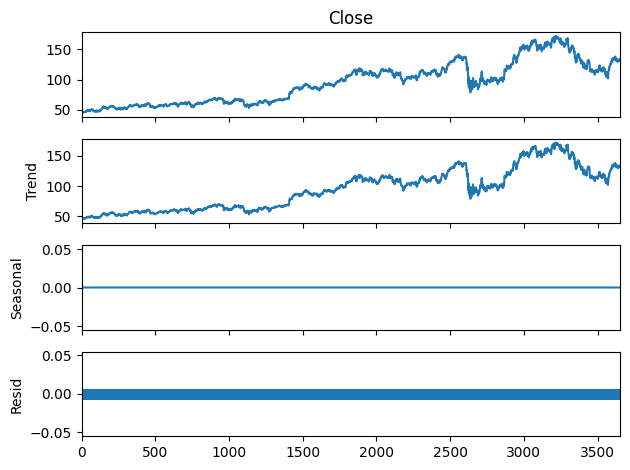

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=1)

result.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
data=df['Close']
data_rolling_mean = data.rolling(window=7).mean().fillna(0)

train_data, test_data = train_test_split(data_rolling_mean, train_size=0.8, shuffle=False)

print("Train set length:", len(train_data))
print("Test set length:", len(test_data))

Train set length: 2922
Test set length: 731


In [ ]:
! pip install pmdarima
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
auto_model = auto_arima(train_data, start_p=0, start_q=0,
                        test='adf',
                        max_p=5, max_q=5,
                        m=1,
                        d=None,
                        seasonal=False,
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(auto_model.summary())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7949.337, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7842.621, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7864.886, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7953.384, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7797.496, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7780.999, Time=1.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7778.926, Time=1.29 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7780.730, Time=1.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7780.806, Time=2.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7779.284, Time=2.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7782.705, Time=2.17 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=7779.446, Time=0.43 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 13.119 seconds
        

In [ ]:
auto_model.order

(4, 1, 0)

In [ ]:
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


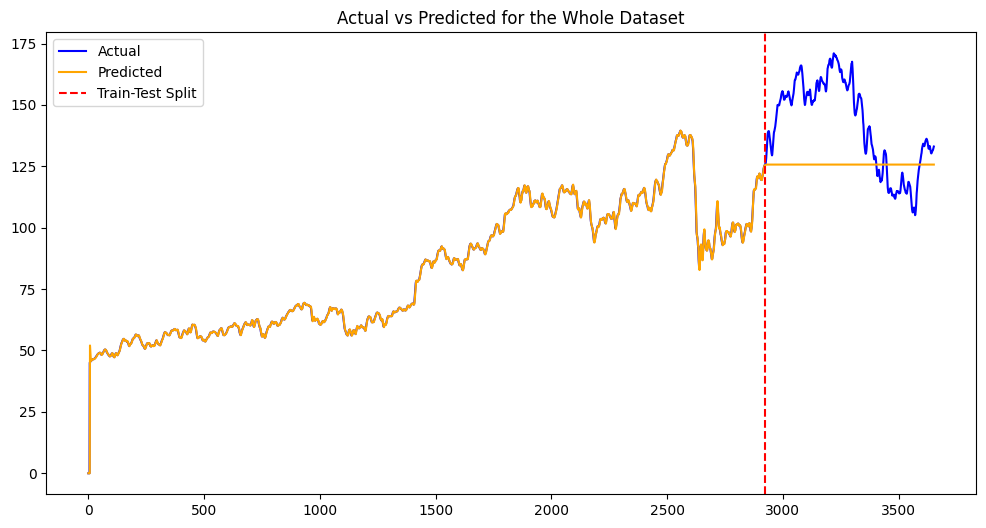

In [ ]:
full_dataset_pred = model_fit.predict(start=0, end=len(data_rolling_mean)-1, typ='levels')

plt.figure(figsize=(12, 6))
plt.plot(data_rolling_mean, label='Actual', color='blue')
plt.plot(full_dataset_pred, label='Predicted', color='orange')
plt.axvline(x=len(train_data), color='r', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('Actual vs Predicted for the Whole Dataset')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mae_test = mean_absolute_error(data_rolling_mean[len(train_data):], full_dataset_pred[len(train_data):])


print('The MAE for train is',mae_train)
print('The MAE for test is',mae_test)

The MAE for train is 0.2368861282342221
The MAE for test is 20.659844463277466


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mse_test = mean_squared_error(data_rolling_mean[len(train_data):], full_dataset_pred[len(train_data):])

print('The MSE for train is',mse_train)
print('The MSE for test is',mse_test)

The MSE for train is 0.8366127498418433
The MSE for test is 593.0911178266483


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for test is', rmse_test)

The RMSE for train is 0.9146653758844506
The RMSE for test is 24.35346213224412
